## Read model made with Doc2vec

In [1]:
from gensim.models.doc2vec import Doc2Vec
import pathlib
paths = [str(p) for p in pathlib.Path('./out/data/').rglob("*/*.model")]
models = [Doc2Vec.load(path) for path in paths] 
print(models)

[<gensim.models.doc2vec.Doc2Vec object at 0x000002227CC05B50>, <gensim.models.doc2vec.Doc2Vec object at 0x000002225B78E340>, <gensim.models.doc2vec.Doc2Vec object at 0x000002225B79C2B0>, <gensim.models.doc2vec.Doc2Vec object at 0x000002225B7A4CA0>, <gensim.models.doc2vec.Doc2Vec object at 0x000002225B7AE8B0>]


## Frequency of the use of words

In [3]:
%run -i count_words.py

['out\\data\\HI2 2020-Report_02-2-57288\\words.csv', 'out\\data\\HI2 2020-Report_02-3-57289\\words.csv', 'out\\data\\HI2 2020-Report_02-4-1-57290\\words.csv', 'out\\data\\HI2 2020-Report_02-4-2-57294\\words.csv', 'out\\data\\HI2 2020-Report_02-5-57291\\words.csv']

 out\data\HI2 2020-Report_02-2-57288\words.csv
[('記憶', 389), ('意味', 65), ('的', 60), ('長期', 58), ('短期', 56), ('恣意', 49), ('未来', 47), ('展望記憶', 46), ('作業', 46), ('複数', 40), ('人', 22), ('機器', 21), ('世界', 19), ('保持', 19), ('項目', 16), ('関係', 12), ('経験', 9), ('最近', 8), ('過去', 8), ('能力', 8)]

 out\data\HI2 2020-Report_02-3-57289\words.csv
[('制約', 321), ('的', 229), ('意味', 119), ('状況', 111), ('可能', 63), ('操作', 54), ('文化的', 51), ('文化', 49), ('何', 47), ('物理', 46), ('制御', 46), ('論理', 46), ('論理的', 42), ('部品', 42), ('物理的制約', 38), ('行為', 38), ('幅', 35), ('行動', 34), ('社会的', 33), ('許容', 32)]

 out\data\HI2 2020-Report_02-4-1-57290\words.csv
[('制約', 97), ('的', 50), ('部品', 50), ('どちら', 28), ('共通', 28), ('説明書', 26), ('意味', 24), ('物理的制約', 22), ('

['out\\data\\HI2 2020-Report_02-2-57288\\word_frequency.csv', 'out\\data\\HI2 2020-Report_02-3-57289\\word_frequency.csv', 'out\\data\\HI2 2020-Report_02-4-1-57290\\word_frequency.csv', 'out\\data\\HI2 2020-Report_02-4-2-57294\\word_frequency.csv', 'out\\data\\HI2 2020-Report_02-5-57291\\word_frequency.csv']


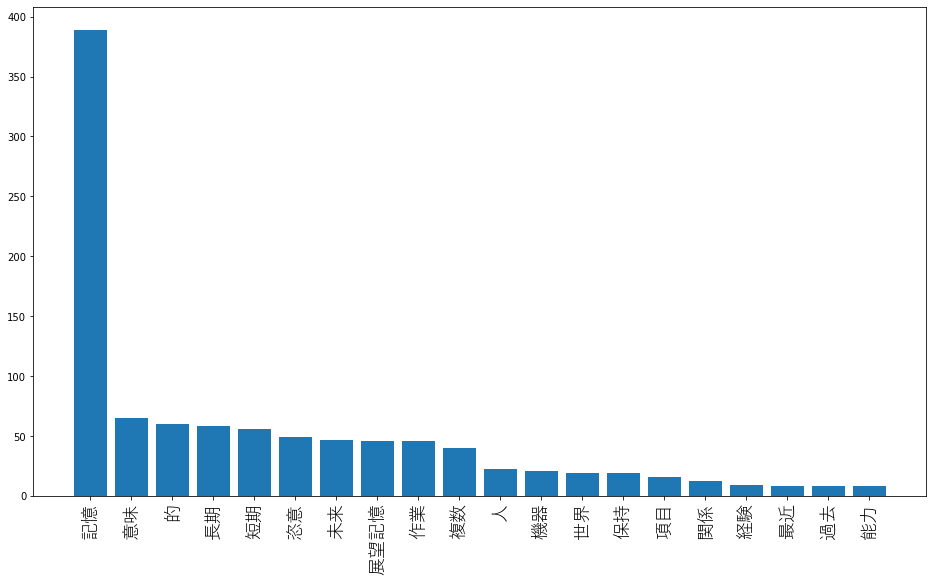

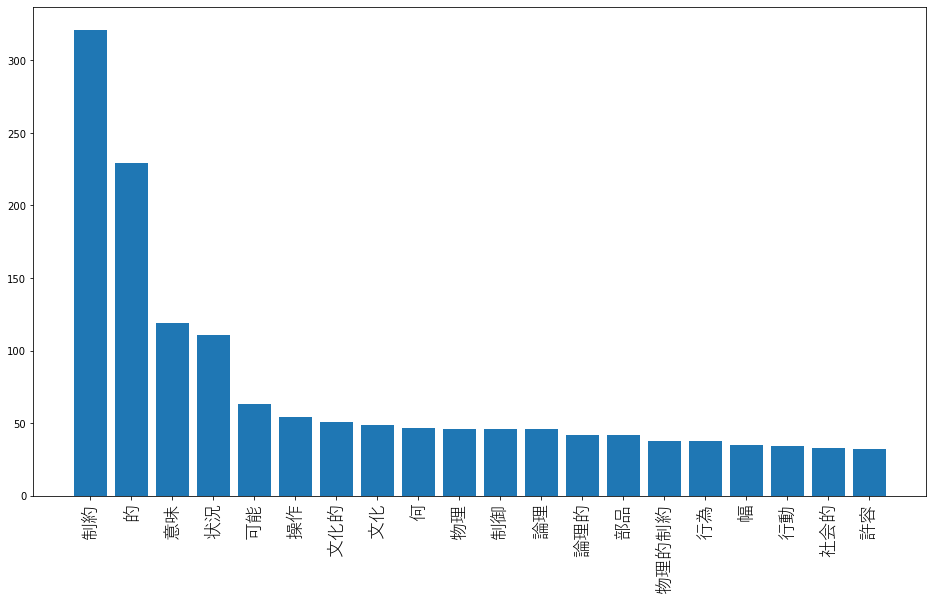

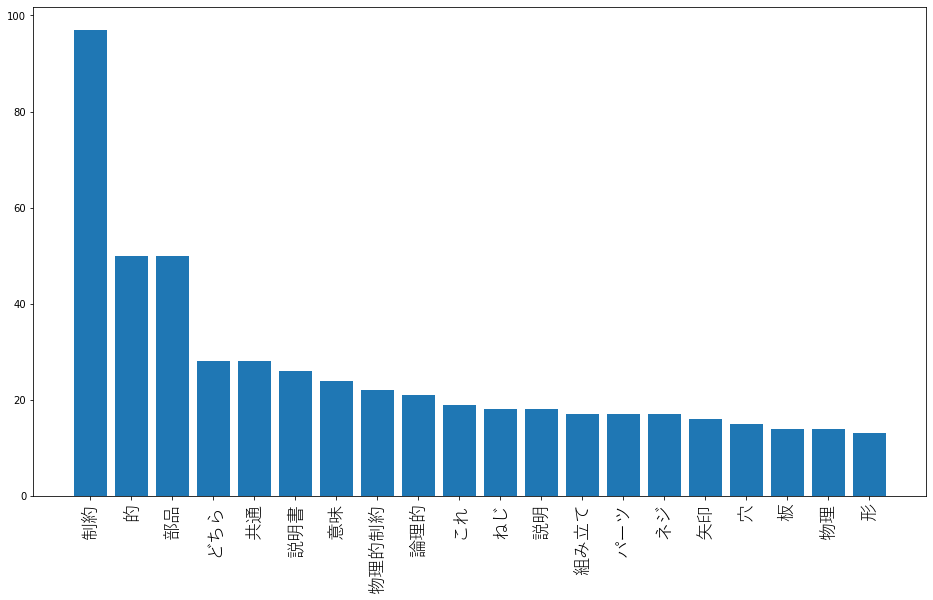

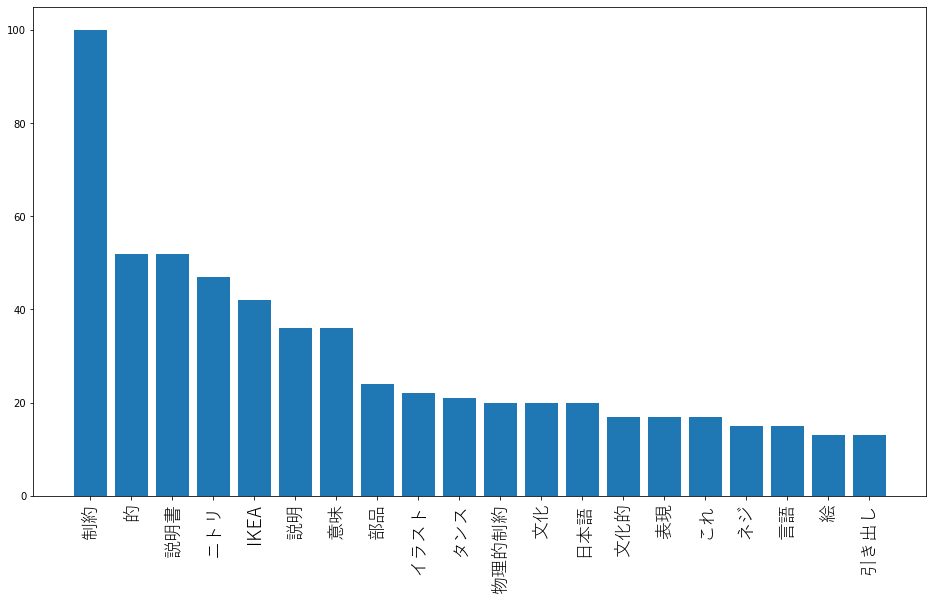

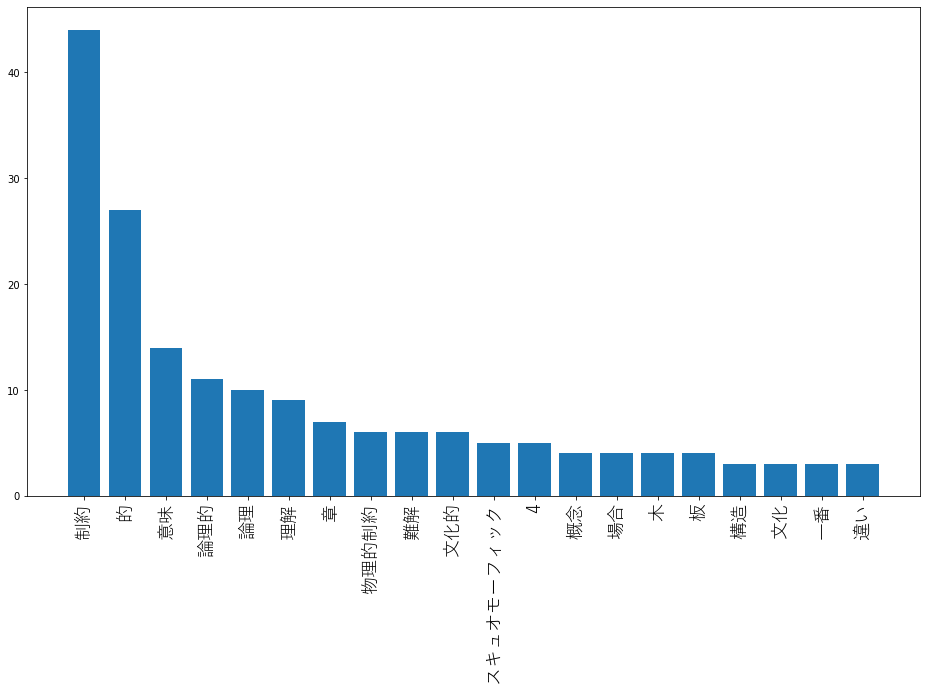

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

paths_hist = [str(p) for p in pathlib.Path('./out/data/').rglob("*/word_frequency.csv")]
print(paths_hist)

dfs_hist = []
for i in range(len(paths_hist)):
    path_hist = pd.read_csv(paths_hist[i],header=None)

    xs = path_hist.values.tolist()

    x_pos = [i for i in range(len(xs))]
    x = [i[0] for i in xs]
    vals = [i[1] for i in xs]

    plt.figure(figsize=(16, 9))

    plt.bar(x, vals)

    igfont = {'family':'Yu Gothic', 'fontsize': '18'}
    plt.xticks(x_pos, x,**igfont,rotation='vertical')
    plt.savefig()
    plt.show()

### Show tags

In [25]:
tags = [models[0].docvecs.index_to_doctag(i) for i in range(0,len(models[0].docvecs))]
print(tags)

['0000', '176997', '176990', '176970', '176988', '176968', '177016', '176965', '177006', '176967', '177009', '177001', '176975', '176980', '176962', '177018', '176989', '176976', '176966', '176986', '176998', '177014', '177002', '176992', '176978', '176999', '176963', '176972', '177011', '177003', '176979', '176981', '177008', '176977', '176987', '176969', '177000', '177012', '176996', '176973', '177004', '176974', '176971', '176994', '177019', '176984', '177015', '176995', '176985', '177005', '177013', '177020', '177021', '177007']


## 01-1

In [12]:
print([ w[0] for w in models[0].wv.most_similar(positive=['アフォーダンス'], topn=10)])
# print(models[0].wv.most_similar(positive=['アフォーダンス'], topn=5))
print([ w[0] for w in models[0].wv.most_similar(positive=['シグニファイア'], topn=10)])
# print(models[0].wv.most_similar(positive=['アフォーダンス'], topn=5))

['行動', '間', '関係', 'シグニファイア', '人', '存在', '知覚', 'デザイン', '違い', '可能']
['アフォーダンス', '行動', '関係', '知覚', '人', '可能性', '人間', 'デザイン', '適切', '違い']


In [28]:
print([ models[0].docvecs.similarity(0,i) for i in range(len(tags))])


[1.0, 0.9973527, 0.9976291, 0.99803394, 0.9915947, 0.9979337, 0.9971168, 0.9923827, 0.9967628, 0.96280944, 0.9977825, 0.9961859, 0.9952368, 0.9878737, 0.9972923, 0.9954219, 0.9963047, 0.9967937, 0.99654216, 0.90813684, 0.9968381, 0.99647766, 0.9980494, 0.99650335, 0.9961251, 0.99689746, 0.9959556, 0.99183345, 0.9963031, 0.99387497, 0.996193, 0.99637717, 0.99813026, 0.9946581, 0.9978614, 0.99756634, 0.99460113, 0.99594665, 0.99404573, 0.9919152, 0.99657094, 0.98854107, 0.99528754, 0.9938628, 0.9955791, 0.99490756, 0.9962411, 0.99809235, 0.9963862, 0.9977949, 0.97903025, 0.9959919, 0.99779576, 0.9354783]


In [29]:
print(models[0].docvecs.most_similar(0))

[('177008', 0.9981302618980408), ('176995', 0.9980922937393188), ('177002', 0.9980494379997253), ('176970', 0.9980339407920837), ('176968', 0.9979336261749268), ('176987', 0.997861385345459), ('177021', 0.9977958798408508), ('177005', 0.9977949261665344), ('177009', 0.9977823495864868), ('176990', 0.9976290464401245)]


## 01-2

In [544]:
print([ w[0] for w in models[1].wv.most_similar(positive=['システムイメージ'], topn=10)])
# print(models[0].wv.most_similar(positive=['システムイメージ'], topn=5))

['デザイナー', '概念', 'ユーザー', 'モデル', 'デザイン', '共有', '形成', '製品', 'それ', 'コミュニケーション']


## 01-3

In [545]:
print([ w[0] for w in models[2].wv.most_similar(positive=['連動'], topn=10)])
# print(models[0].wv.most_similar(positive=['連動'], topn=5))

['レベル', '内省', '情動', '的', '処理', 'すべて', '行動', '認知', '期待', '本能']


## 01-6

In [546]:
print([ w[0] for w in models[5].wv.most_similar(positive=['概念'], topn=10)])
# print(models[0].wv.most_similar(positive=['概念'], topn=5))

['デザイン', '理解', '用語', '本能', '1', '意識', '自分', '説明', '的', '行為']


In [551]:
sim_value = models[0].docvecs.similarity_unseen_docs(models[0], ['シグニファイア'], ['関係性'], alpha=1, min_alpha=0.0001, steps=5)
print(sim_value)

0.99039674


# Extra analysis
## t-SNE

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

https://distill.pub/2016/misread-tsne/

https://towardsdatascience.com/t-sne-python-example-1ded9953f26


https://qiita.com/Ikeda_yu/items/94247d819e6a0808d0b7

https://qiita.com/stfate/items/8988d01aad9596f9d586

https://qiita.com/koshian2/items/321690d8b94a77931bae

https://bunseki-train.com/t-sne-code-example/

In [507]:
from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

model = models[0]

vocab_dict = model.wv.vocab
vocab = [v for v in vocab_dict.keys()]
x_vec = model[vocab]

tsne = TSNE(n_components=2, perplexity=30, verbose=1, n_iter=5000)
print(tsne.get_params(), '\n')
x_vec_tsne = tsne.fit_transform(x_vec)
df_tags = pd.DataFrame(x_vec_tsne, index=vocab, columns=['x', 'y'])

plt.figure(figsize=(16, 10),dpi=600)
sns.set(font='Yu Gothic')
sns.scatterplot(x=df_tags.x, y=df_tags.y,hue=df_tags.index)

# for ax in g.axes.ravel():
df_list = df_tags.reset_index().values.tolist()
for t, x, y in df_list:
    plt.annotate(t, (x, y))

plt.legend(bbox_to_anchor=(0.6, 1), ncol=4, loc=2, borderaxespad=0.)
plt.savefig('./out/tsne.png')
plt.show()


{'angle': 0.5, 'early_exaggeration': 12.0, 'init': 'random', 'learning_rate': 200.0, 'method': 'barnes_hut', 'metric': 'euclidean', 'min_grad_norm': 1e-07, 'n_components': 2, 'n_iter': 5000, 'n_iter_without_progress': 300, 'n_jobs': None, 'perplexity': 30, 'random_state': None, 'verbose': 1} 

[t-SNE] Computing 71 nearest neighbors...
[t-SNE] Indexed 72 samples in 0.000s...
[t-SNE] Computed neighbors for 72 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 72 / 72
[t-SNE] Mean sigma: 0.222127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.782360
[t-SNE] KL divergence after 1500 iterations: 0.266912


In [403]:
len(df_tags[['x', 'y']].values.tolist())

72

(72, 2)


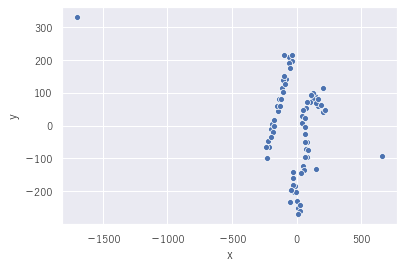

In [402]:
df_tags.reset_index().values.tolist() + df_tags[['x', 'y']].values.tolist()

In [14]:
vecs = []
for doc_tag in doc_tags_person:
    vecs.append(models[0].infer_vector([doc_tag],epochs=20))
vecs = np.array(vecs)    

NameError: name 'doc_tags_person' is not defined

In [15]:
doc_weights =[]
doc_tags_person =[]
for i in range(0,len(models[0].docvecs)):
    doc_weights.append(models[0].docvecs[i].tolist())
    doc_tags_person.append(models[0].docvecs.index_to_doctag(i)) #model2.docvecs